In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
# Load the dataset correctly
df = pd.read_csv("corporate_stress_dataset.csv")  # Ensure the correct filename


<ipython-input-14-f50d5092bbc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=health_issue_counts.values, y=health_issue_counts.index, palette="viridis")


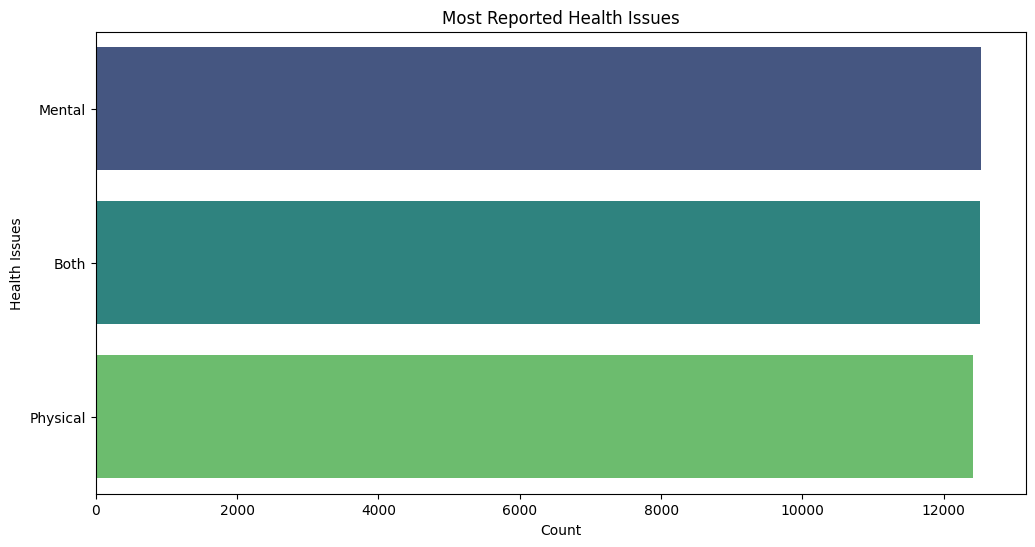

In [ ]:
# Count the most common health issues
health_issue_counts = df['Health_Issues'].value_counts().head(10)  # Top 10 health issues

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=health_issue_counts.values, y=health_issue_counts.index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Health Issues")
plt.title("Most Reported Health Issues")
plt.show()


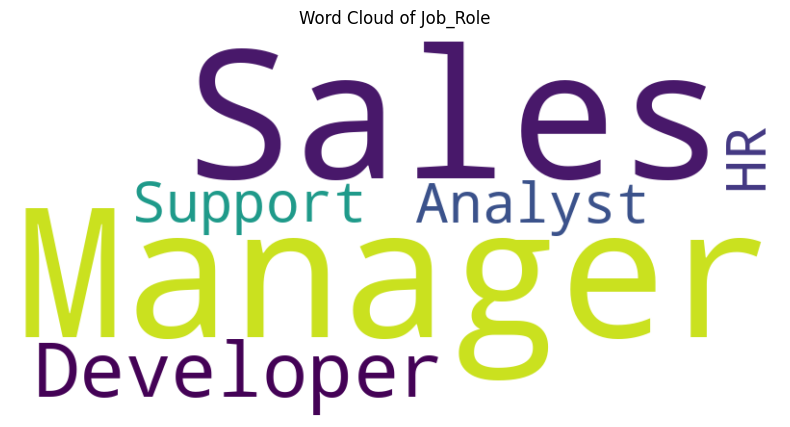

In [ ]:
# List of potential text-based categorical columns for word cloud generation
text_columns = ["Job_Role"]

# Generate word clouds for each column
wordclouds = {}
for col in text_columns:
    text_data = " ".join(df[col].astype(str).fillna(''))  # Ensure text format and handle NaN values
    wordclouds[col] = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

# Display word clouds for each variable
for col, wordcloud in wordclouds.items():
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud of {col}")
    plt.show()


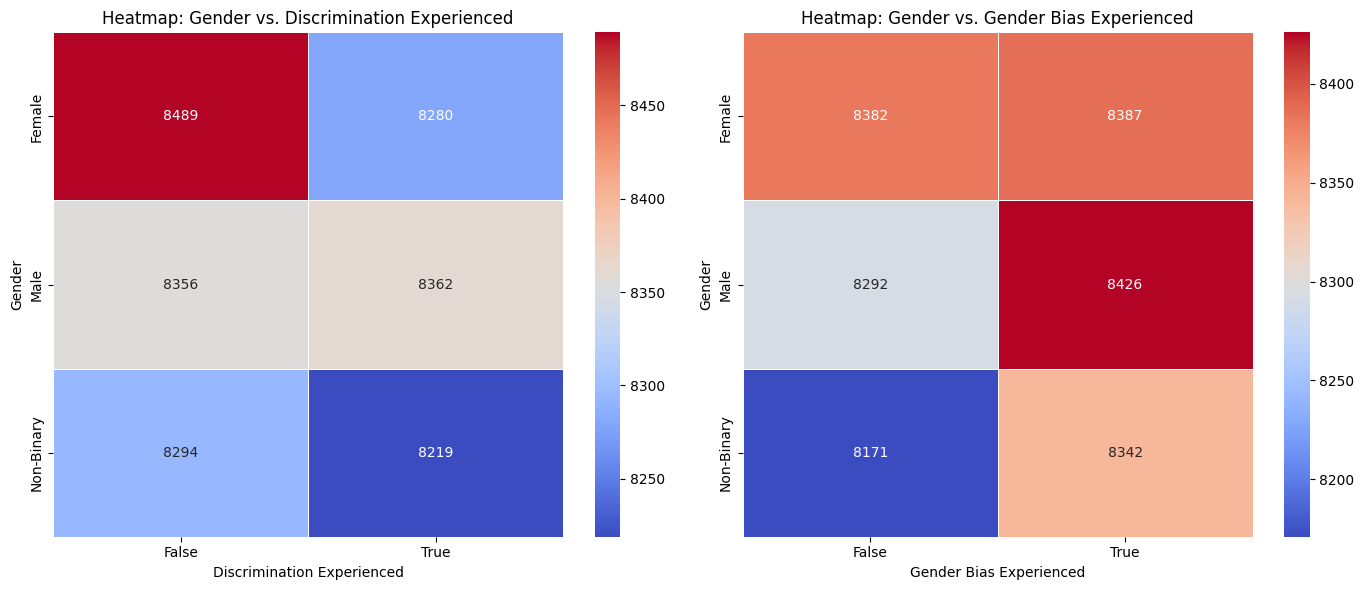

In [ ]:
# First, create the heatmap for Gender vs. Discrimination/Bias Experienced

# Prepare categorical counts
gender_discrimination = pd.crosstab(df['Gender'], df['Discrimination_Experienced'])
gender_bias = pd.crosstab(df['Gender'], df['Gender_Bias_Experienced'])

# Create a figure for the two heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap for Gender vs. Discrimination Experienced
sns.heatmap(gender_discrimination, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5, ax=axes[0])
axes[0].set_title("Heatmap: Gender vs. Discrimination Experienced")
axes[0].set_xlabel("Discrimination Experienced")
axes[0].set_ylabel("Gender")

# Heatmap for Gender vs. Gender Bias Experienced
sns.heatmap(gender_bias, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5, ax=axes[1])
axes[1].set_title("Heatmap: Gender vs. Gender Bias Experienced")
axes[1].set_xlabel("Gender Bias Experienced")
axes[1].set_ylabel("Gender")

# Show the heatmaps
plt.tight_layout()
plt.show()


